In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\GCOEN\Bike Rental\bike_rent.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [3]:
df.shape

(17379, 17)

In [4]:
df.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [6]:
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [7]:
df.describe(include = 'object')

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
unique,731,5,3,13,3,3,5,51,66,90,31,323,777
top,01-01-2011,fall,2012,5,No,Working Day,Clear,0.62,0.6212,0.88,0,0,4
freq,24,4496,8734,1488,16878,11862,11412,726,988,657,2180,1581,307


In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.nunique()

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Data Cleaning
# Replace '?' with NaN and convert appropriate columns to numeric
df.replace('?', pd.NA, inplace=True)

In [12]:
# Convert columns to numeric, handling missing values
columns_to_convert = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [13]:
df[columns_to_convert].isnull().sum()

temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
dtype: int64

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df[columns_to_convert].isnull().sum()

temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

In [16]:
# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [17]:
def validate_cleaning(df):
    print("\nData Types After Cleaning:\n", df.dtypes)
    print("\nMissing Values After Cleaning:\n", df.isnull().sum())

validate_cleaning(df)


Data Types After Cleaning:
 instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
hr                     int64
holiday               object
weekday                int64
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                    int64
dtype: object

Missing Values After Cleaning:
 instant       0
dteday        0
season        6
yr            1
mnth          1
hr            0
holiday       1
weekday       0
workingday    5
weathersit    4
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [18]:
df.dropna(inplace = True)

In [19]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Exploratory Data Analysis

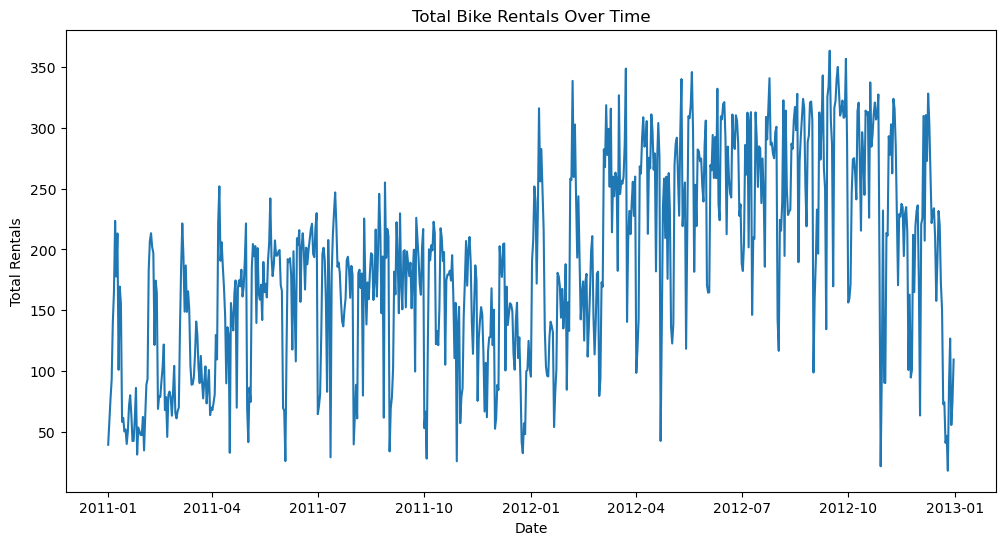

In [20]:
# Plot total bike rentals over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df, ci=None)
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

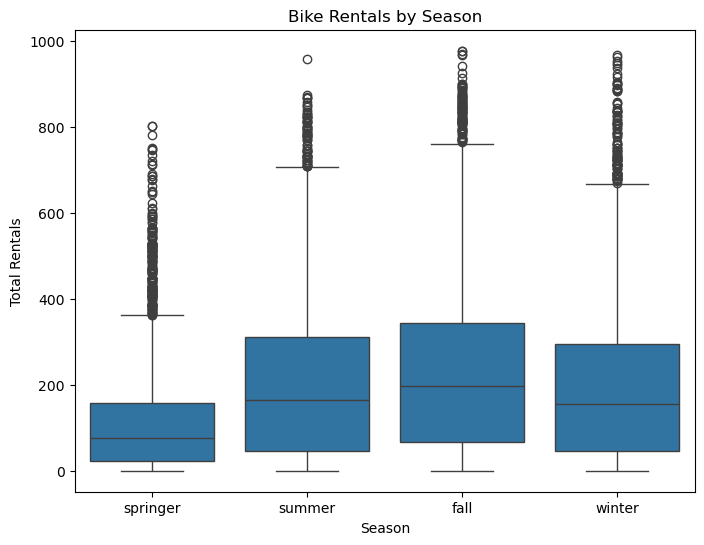

In [21]:
# Distribution of bike rentals by season
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

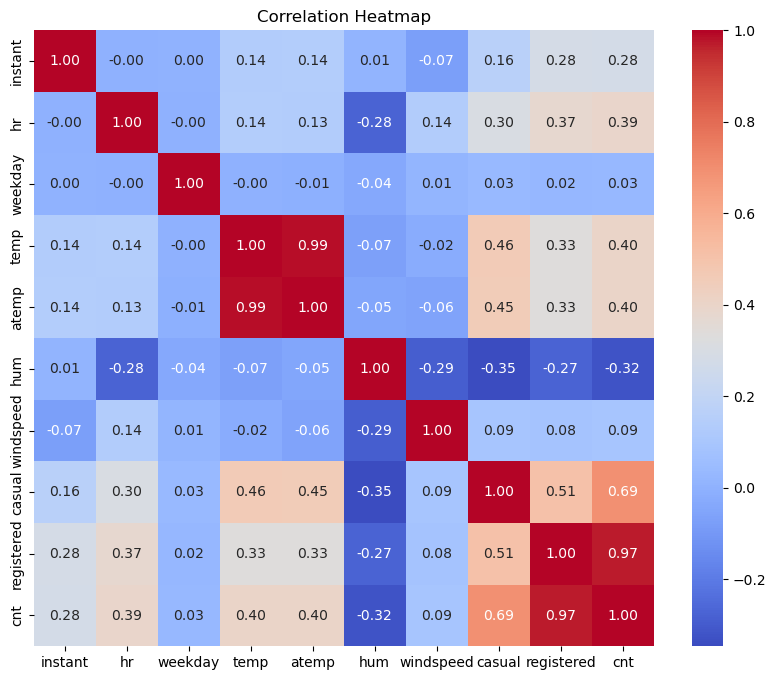

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

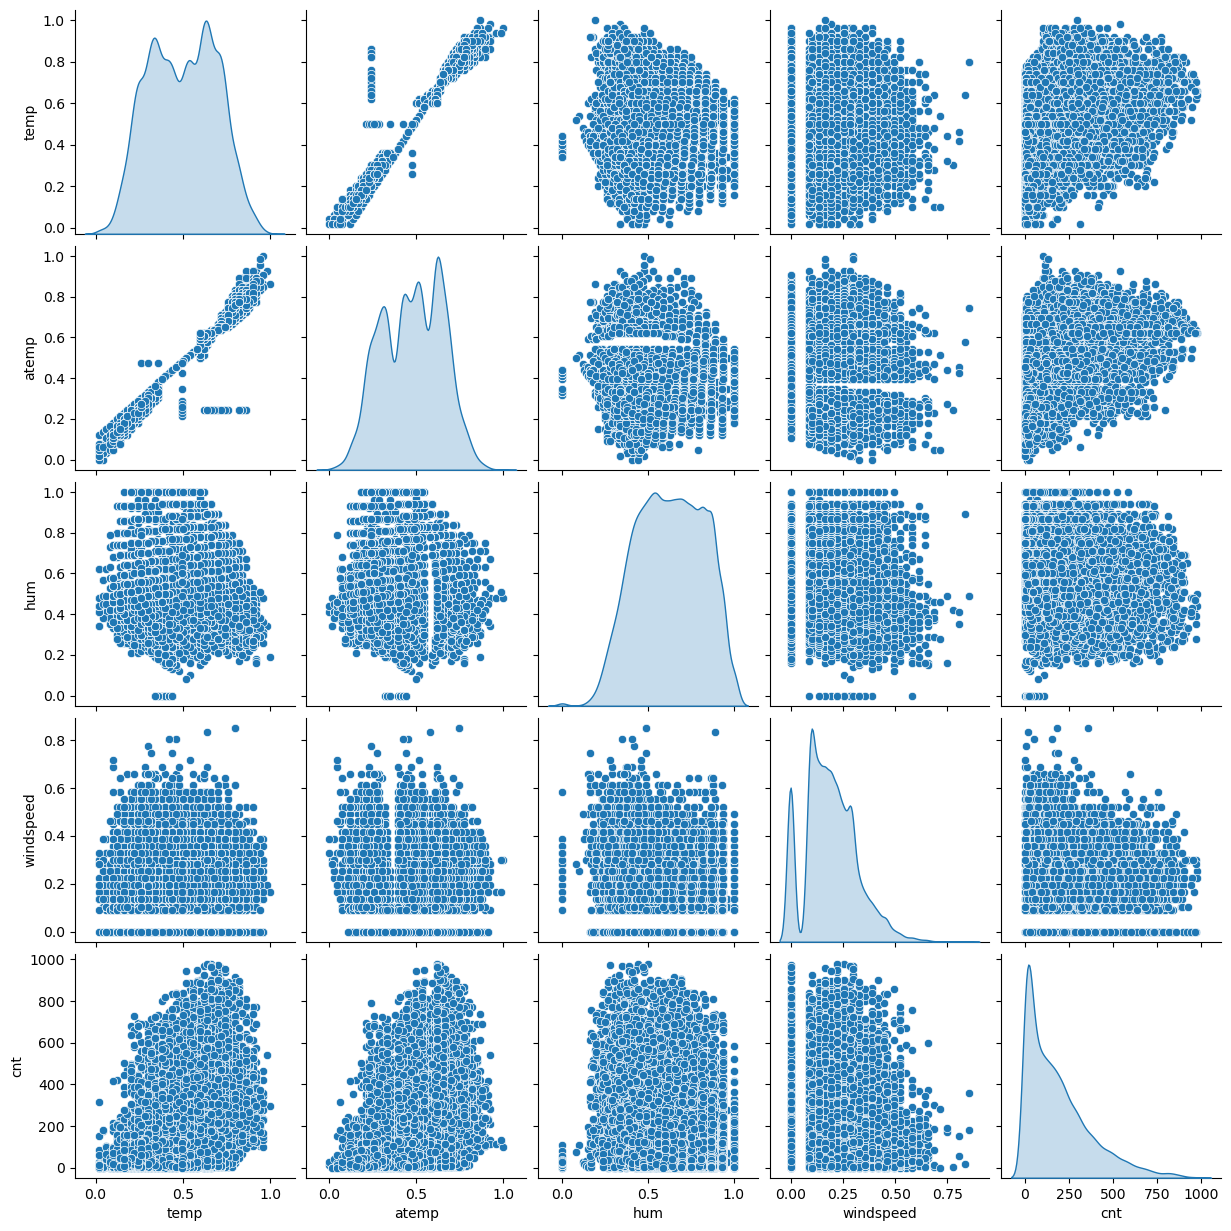

In [23]:
# Pairplot for key variables
sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], diag_kind='kde')
plt.show()

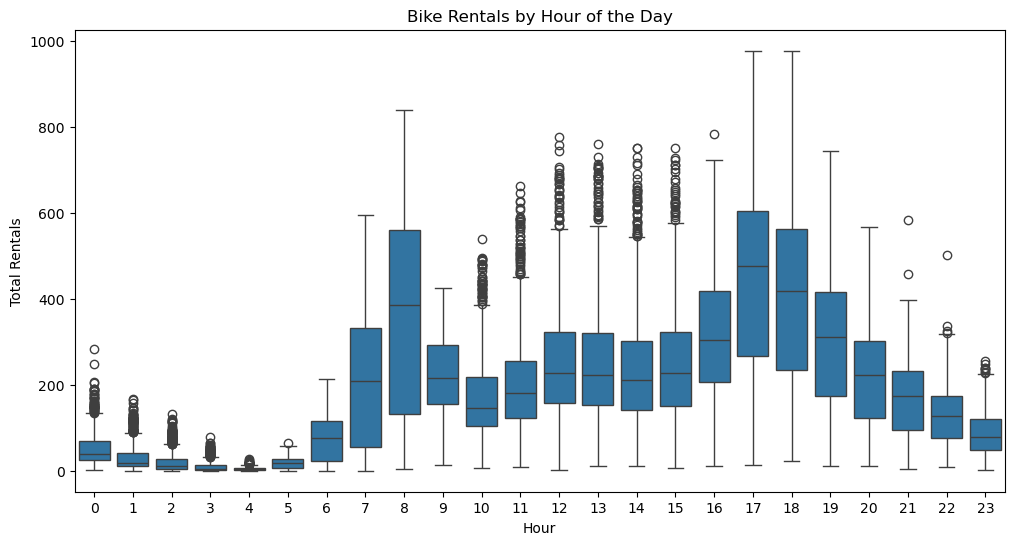

In [24]:
# Analyze rentals by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.show()

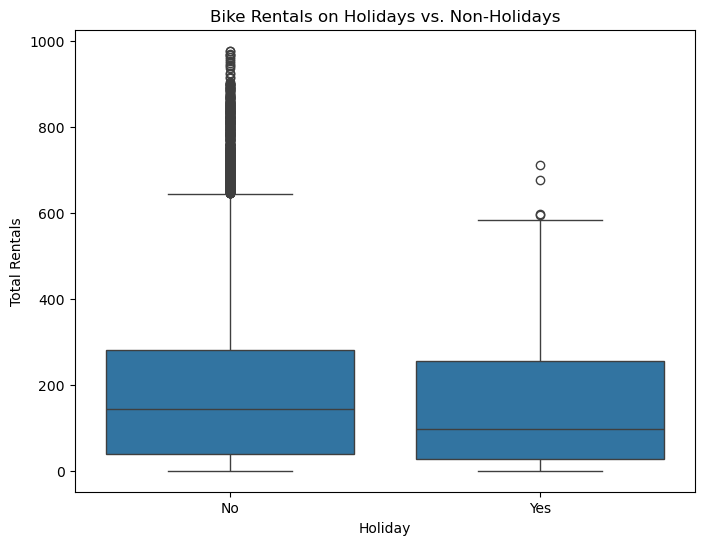

In [25]:
# Rentals on holidays vs. non-holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Total Rentals')
plt.show()

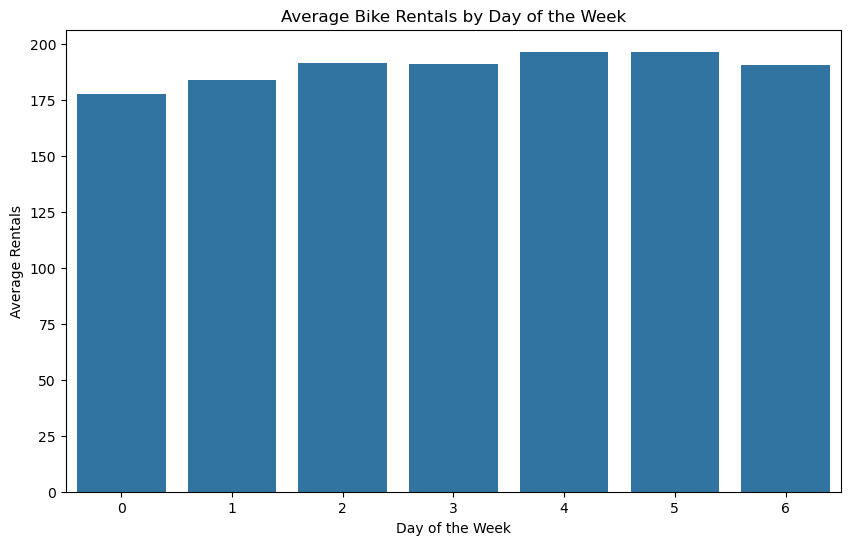

In [26]:
# Analyze rentals by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df, ci=None)
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.show()

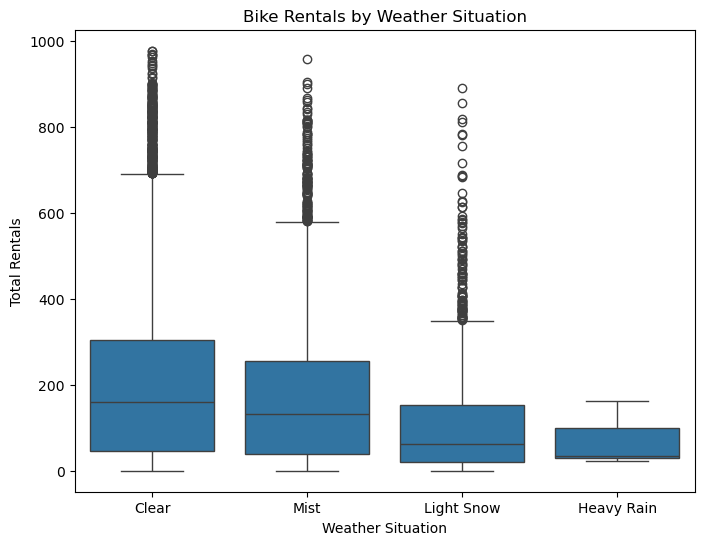

In [27]:
# Impact of weather conditions on rentals
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

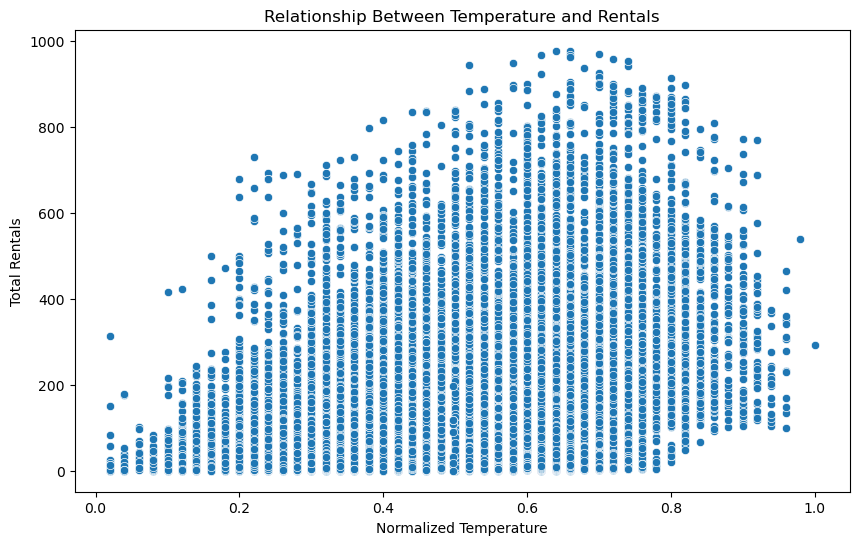

In [28]:
# Relationship between temperature and rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Relationship Between Temperature and Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()

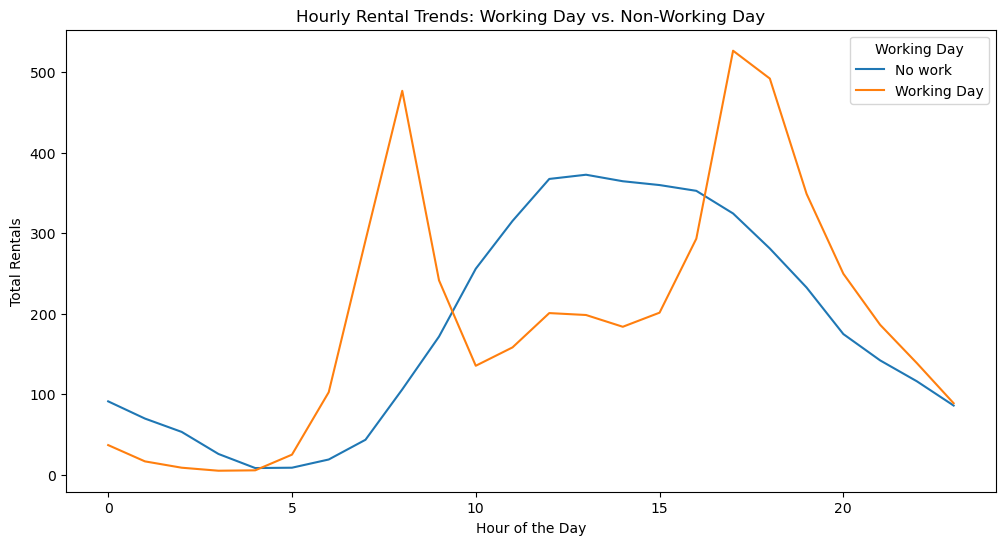

In [29]:
# Hourly trends segmented by working day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df, ci=None)
plt.title('Hourly Rental Trends: Working Day vs. Non-Working Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='Working Day')
plt.show()

In [30]:
# Time Series Analysis
# Group data by date and calculate daily total rentals
daily_data = df.groupby('dteday')['cnt'].sum().reset_index()

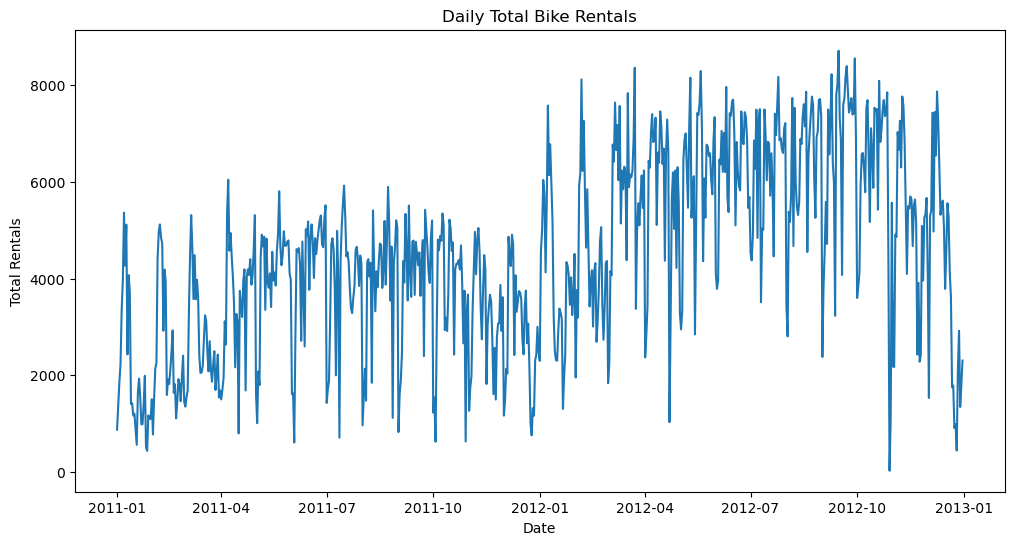

In [31]:
# Plot daily total rentals
daily_data['Day of Week'] = daily_data['dteday'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=daily_data, ci=None)
plt.title('Daily Total Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()

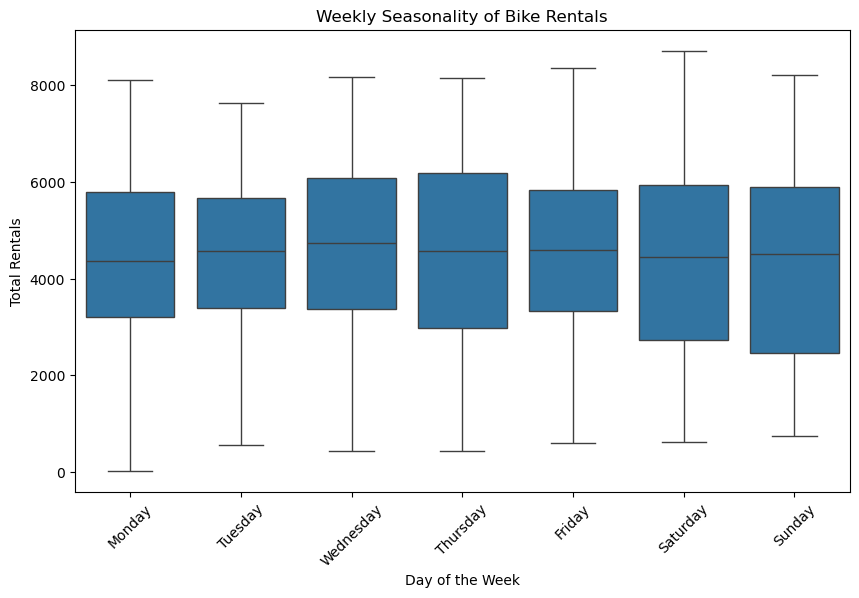

In [32]:
# Weekly seasonality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='cnt', data=daily_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekly Seasonality of Bike Rentals')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Monthly seasonality
df['Month'] = df['dteday'].dt.month_name()
monthly_data = df.groupby('Month')['cnt'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()

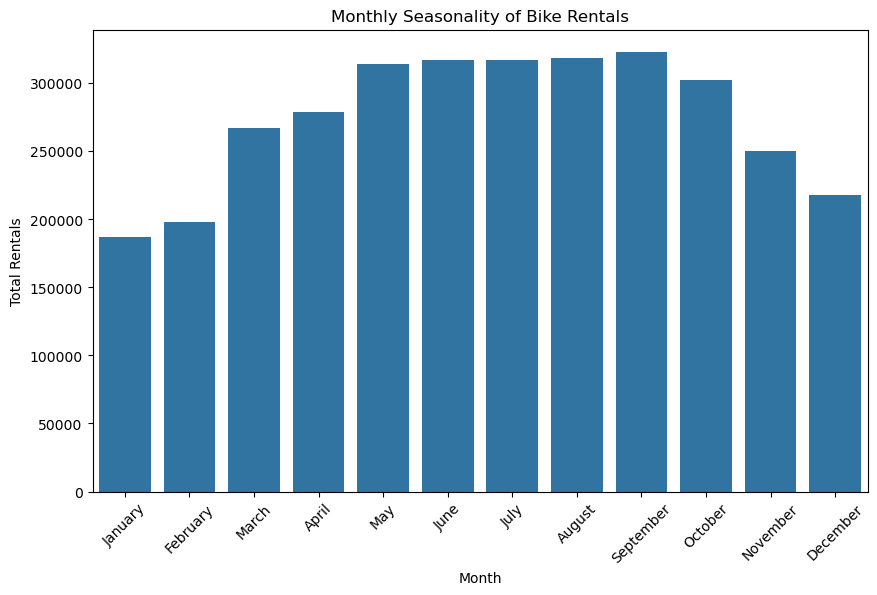

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='cnt', data=monthly_data, ci=None)
plt.title('Monthly Seasonality of Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

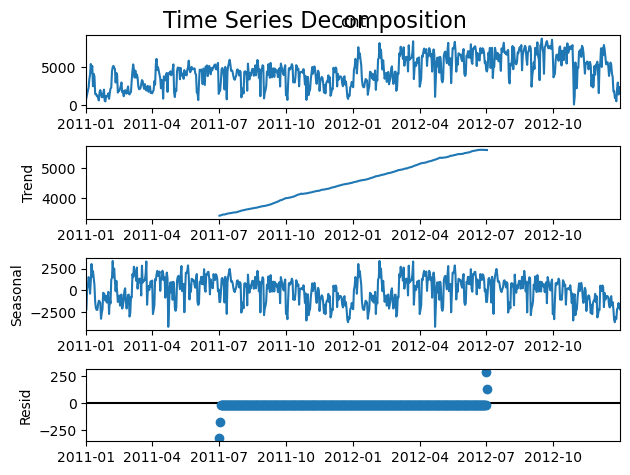

In [35]:
# Decomposition of Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

ts_data = daily_data.set_index('dteday')['cnt']
decomposition = seasonal_decompose(ts_data, model='additive', period=365)

decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

In [36]:
df['hum'] = pd.to_numeric(df['hum'], errors='coerce')

In [37]:
# Select numeric columns for outlier removal
numeric_cols = df.select_dtypes(include=[np.number])

In [38]:
# Function to remove outliers using the IQR rule
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [39]:
# Remove outliers
cleaned_data = remove_outliers_iqr(df, numeric_cols.columns)

In [40]:
df.shape, cleaned_data.shape

((17361, 18), (14950, 18))

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
# Separate features and target variable
X = cleaned_data.drop(['cnt', 'dteday'], axis=1)
y = cleaned_data['cnt']

In [43]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

In [44]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [45]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10465, 16)
(4485, 16)
(10465,)
(4485,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
# Dictionary to store model performance
model_performance = {}

In [48]:
# Helper function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, mae, rmse

In [49]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [50]:
# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    r2, mae, rmse = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    model_performance[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

In [51]:
# Display model performance
model_performance

{'Linear Regression': {'R2': 0.9999997661402574,
  'MAE': 0.044431888832413044,
  'RMSE': 0.05882727805052239},
 'Decision Tree': {'R2': 0.9994721471861968,
  'MAE': 1.5743589743589743,
  'RMSE': 2.794843156962093},
 'Random Forest': {'R2': 0.9999008666198571,
  'MAE': 0.655603121516165,
  'RMSE': 1.2111863776775116},
 'Gradient Boosting': {'R2': 0.9994925556387189,
  'MAE': 1.932897458739447,
  'RMSE': 2.740281860438057}}

### Conclusion:
#### Linear Regression is the best-performing model with the highest R² and the lowest MAE and RMSE, indicating minimal errors and a near-perfect fit.
#### Random Forest is a strong alternative, with high R² and moderate MAE/RMSE, but it doesn’t outperform Linear Regression.

In [52]:
lr = LinearRegression()

<Axes: >

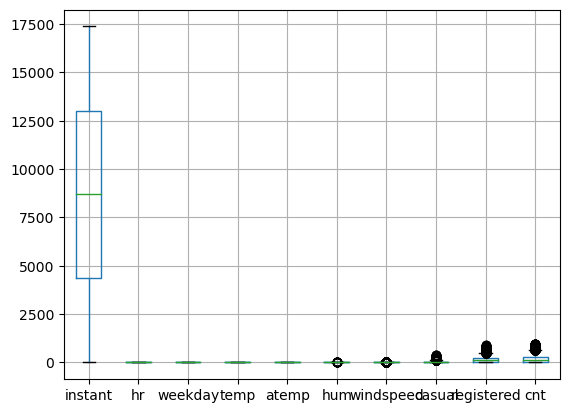

In [53]:
df.boxplot()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming X is a pandas DataFrame
X = pd.get_dummies(X)  # Convert categorical variables
y = y.astype(float)     # Ensure target is numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
lr.score(X_train, y_train)

0.9999375727244669

In [57]:
lr.fit(X_test, y_test)
lr.score(X_test, y_test)

1.0

In [58]:
import joblib
joblib.dump(lr, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

Model saved as 'linear_regression_model.pkl'


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature names and importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)

                   Feature    Importance
8               registered  9.720398e-01
7                   casual  2.772723e-02
0                  instant  7.434930e-05
5                      hum  2.192546e-05
6                windspeed  1.953352e-05
4                    atemp  1.632880e-05
3                     temp  1.606809e-05
1                       hr  1.425128e-05
2                  weekday  1.191220e-05
34         weathersit_Mist  3.041588e-06
9              season_fall  2.811097e-06
11           season_summer  2.719483e-06
31        weathersit_Clear  2.610967e-06
12           season_winter  2.298713e-06
23                  mnth_6  2.136679e-06
13                 yr_2011  2.065062e-06
14                 yr_2012  1.976843e-06
22                  mnth_5  1.910348e-06
25                  mnth_8  1.904065e-06
41              Month_June  1.789870e-06
36            Month_August  1.772569e-06
40              Month_July  1.723225e-06
43               Month_May  1.676058e-06
44          Mont

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get feature scores
feature_scores = selector.scores_

# Create a DataFrame to display feature names and scores
import pandas as pd
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display feature scores
print(feature_scores_df)

                   Feature          Score
8               registered  475595.019206
7                   casual   16587.970756
1                       hr    3912.507205
3                     temp    2202.299748
4                    atemp    2166.369198
5                      hum    1556.557457
10         season_springer     705.360919
0                  instant     618.215553
14                 yr_2012     378.804303
13                 yr_2011     378.804303
30  workingday_Working Day     296.722803
29      workingday_No work     296.722803
15                  mnth_1     288.947994
9              season_fall     269.864149
33   weathersit_Light Snow     209.433837
6                windspeed     152.643451
19                  mnth_2     137.091394
25                  mnth_8      97.848811
39           Month_January      97.067945
31        weathersit_Clear      87.914183
24                  mnth_7      76.907775
23                  mnth_6      69.179039
20                  mnth_3      50

### Target Variable: count (Total Number of Bikes Rented)
### This is typically the total number of bikes rented per hour or day, which includes both casual users and registered users.

#### casual: Number of bikes rented by unregistered (casual) users.
#### registered: Number of bikes rented by registered users.
#### count: Total number of bikes rented (sum of casual and registered).

#### The goal of the business is to ensure a stable supply of rental bikes by predicting demand.
#### The total number of bikes rented (count) represents the overall demand.
#### Predicting total demand is more meaningful for operational planning, such as ensuring enough bikes are available at different times and locations.
